<a href="https://colab.research.google.com/github/Sindhu846/ML-Regression./blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#mounting drive.
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importing libraries required to perform EDA.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading and storing a data to a variable.
path = '/content/drive/MyDrive/Bike Sharing Prediction./SeoulBikeData.csv'

bike_df = pd.read_csv(path,encoding = 'latin',parse_dates=['Date'])


In [ ]:
#Displaying first 5 rows 
bike_df.head().T

,0,1,2,3,4
Date,2017-01-12 00:00:00,2017-01-12 00:00:00,2017-01-12 00:00:00,2017-01-12 00:00:00,2017-01-12 00:00:00
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


In [ ]:
#Details of no of columns and rows.
bike_df.shape

(8760, 14)

In [ ]:
#Displaying column names.
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Some of the column names are renamed.
bike_df.rename(columns={'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'sunlight', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

In [ ]:
#Displaying first 5 rows after renaming.
bike_df.head()

,Date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#information of columns.
bike_df.info

<bound method DataFrame.info of            Date  bike_count  hour  temp  humidity  wind  visibility  dew_temp  \
0    2017-01-12         254     0  -5.2        37   2.2        2000     -17.6   
1    2017-01-12         204     1  -5.5        38   0.8        2000     -17.6   
2    2017-01-12         173     2  -6.0        39   1.0        2000     -17.7   
3    2017-01-12         107     3  -6.2        40   0.9        2000     -17.6   
4    2017-01-12          78     4  -6.0        36   2.3        2000     -18.6   
...         ...         ...   ...   ...       ...   ...         ...       ...   
8755 2018-11-30        1003    19   4.2        34   2.6        1894     -10.3   
8756 2018-11-30         764    20   3.4        37   2.3        2000      -9.9   
8757 2018-11-30         694    21   2.6        39   0.3        1968      -9.9   
8758 2018-11-30         712    22   2.1        41   1.0        1859      -9.8   
8759 2018-11-30         584    23   1.9        43   1.3        1909      -9.3

In [ ]:
#Data type of each column.
bike_df.dtypes

Date               datetime64[ns]
bike_count                  int64
hour                        int64
temp                      float64
humidity                    int64
wind                      float64
visibility                  int64
dew_temp                  float64
sunlight                  float64
rain                      float64
snow                      float64
season                     object
holiday                    object
functioning_day            object
dtype: object

## **DATA CLEANING AND MANIPULATION.**

**1. DEALING WITH MISSING VALUES.**

In [ ]:
#checking for missing values.
bike_df.isnull().sum()

Date               0
bike_count         0
hour               0
temp               0
humidity           0
wind               0
visibility         0
dew_temp           0
sunlight           0
rain               0
snow               0
season             0
holiday            0
functioning_day    0
dtype: int64

In [ ]:
#checking for duplicate rows.
bike_df[bike_df.duplicated()].shape

(0, 14)

There is no missing values in any of the column and dataset doesnot contain duplicate rows.

**2. FORMING NEW COLOUMN WITH GIVEN COLOUMN.**

In [ ]:
# converting Date column dtype object to date 
bike_df['Date']=pd.to_datetime(bike_df['Date'])


In [ ]:
#Extracting day, month and year column from date column.
bike_df['Date']=pd.to_datetime(bike_df['Date'])
bike_df['month'] = bike_df['Date'].apply(lambda x : x.month)
bike_df['day_of_week'] = bike_df['Date'].dt.day_name()
bike_df['weekdays_weekend']=bike_df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day_of_week'],axis=1)

In [ ]:
# convert Hour column integer to Categorical 
bike_df['hour']=bike_df['hour'].astype('object')

**3. DEALING WITH OUTLIERS.**



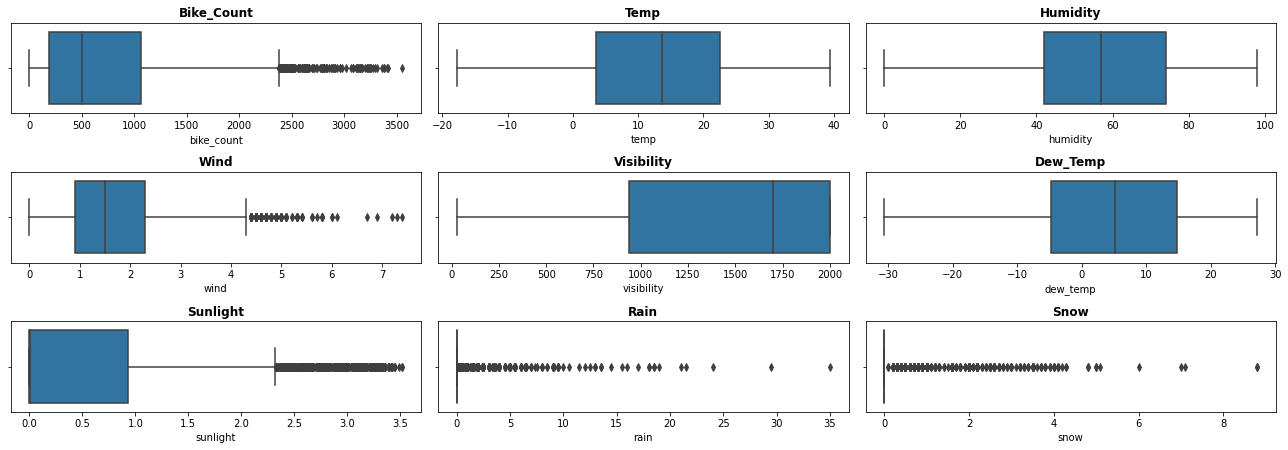

In [ ]:
# Checking for outliers
plt.figure(figsize=(18,8))
for n,column in enumerate(bike_df.describe().columns):
  plt.subplot(4, 3, n+1)
  sns.boxplot(bike_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

It is observed that outliers are present in Bike_count, wind, Sunlight, Rain and Snow column.

In [ ]:
#Removing of outliers from Bike_count column by IQR method.
Q1, Q3, median = bike_df.bike_count.quantile([0.25,0.75,0.5])
IQR=Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
bike_df['bike_count'] = np.where(bike_df['bike_count'] > upper_limit, median,np.where(
                            bike_df['bike_count'] < lower_limit,median,bike_df['bike_count']))

In [ ]:
#Removing of outliers from wind, sunlight, rain and snow column by capping method.
for col in ['wind','sunlight','rain','snow']:
  upper_limit = bike_df[col].quantile(0.99)
  bike_df[col] = np.where(bike_df[col] > upper_limit, upper_limit, bike_df[col])

In [ ]:
bike_df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


## **EXPLORATORY DATA ANALYSIS(EDA)**

**1.ANALYSIS OF NUMERICAL DATA.**

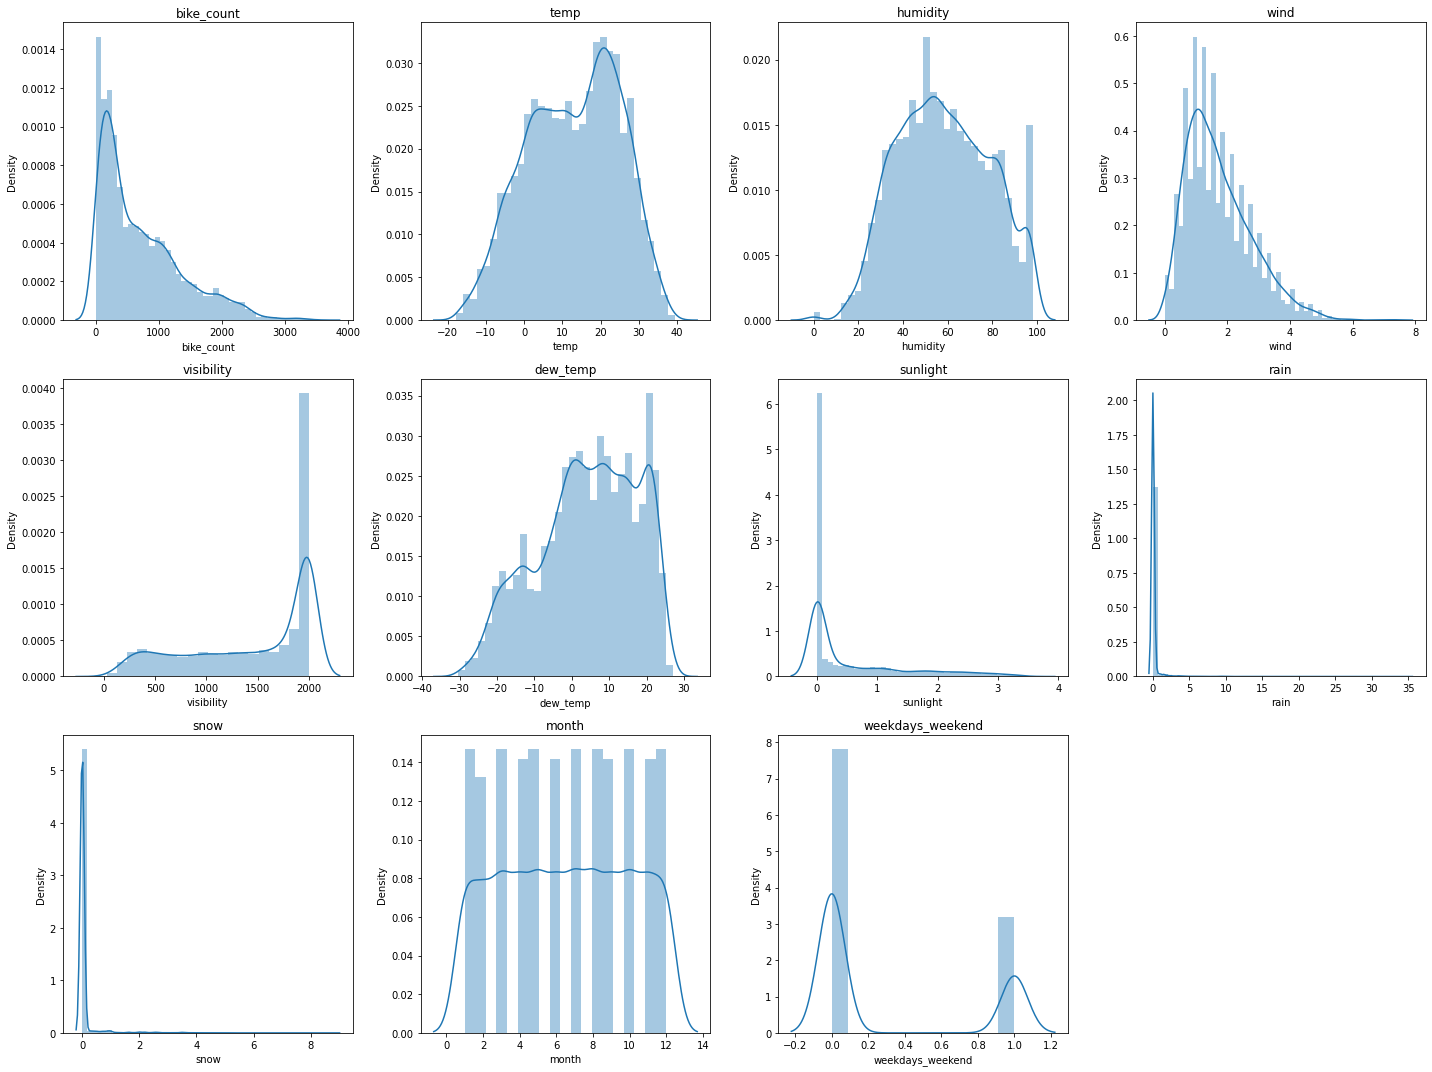

In [ ]:
#Generating density plots for the given dataset and visualizing numerical data.
numeric_features= bike_df.select_dtypes(exclude='object')
n=1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
  plt.subplot(3,4,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

**2.ANALYSIS OF CATEGORICAL DATA.**

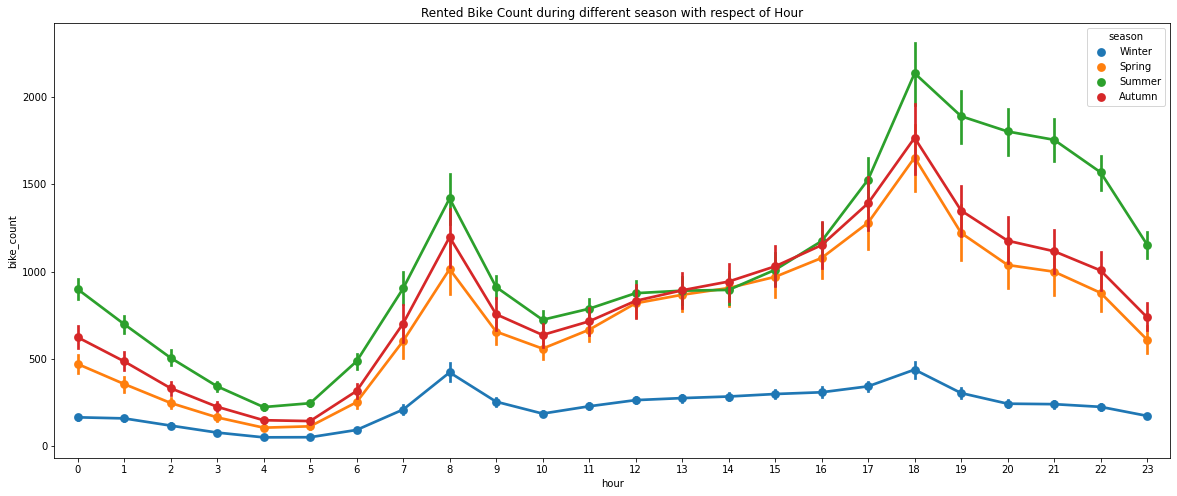

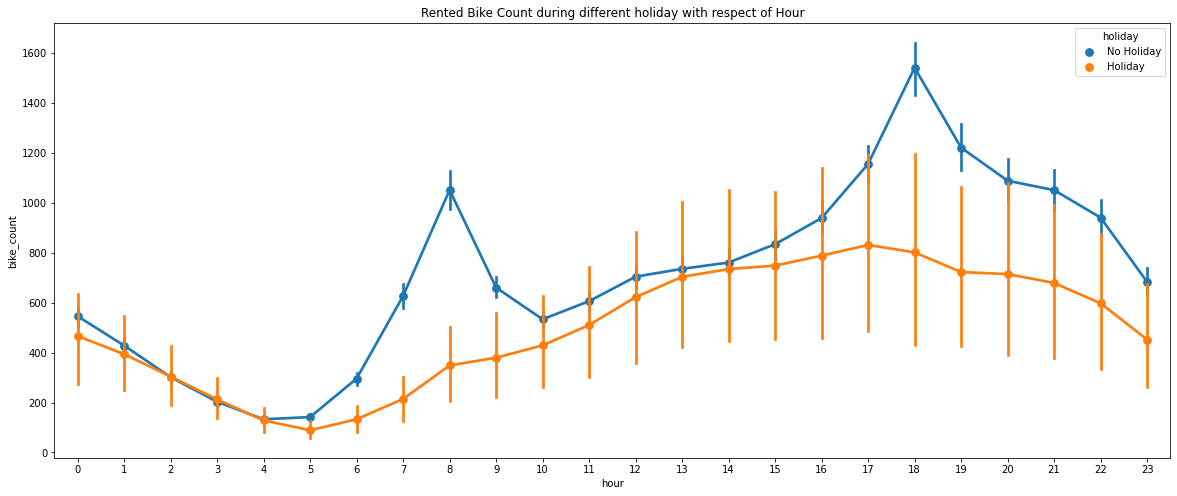

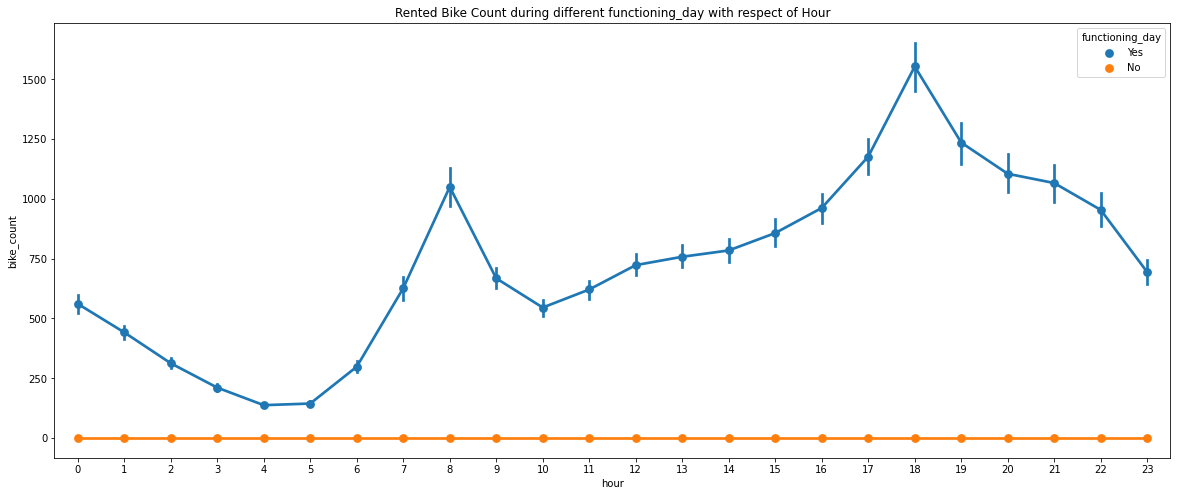

In [ ]:
categorical_features=bike_df.select_dtypes(include='object')
for i in categorical_features.columns:
  if i == 'hour':
    pass
  else:
    plt.figure(figsize=(20,8))
    sns.pointplot(x=bike_df["hour"],y=bike_df['bike_count'],hue=bike_df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

**OBSERVATIONS:**

1.No. of bikes rented are more in summer and less in winter.

2.Bikes taken for rent is less during holidays.

3.During functioning day, max no of bikes are taken for rent.

4.It is observed that bike counts starts to increase after 6'o clock in the morning and reaches maximum at 8'oclock and again starts to decrease.

5.During evening time again renting of bikes starts to increase after 5pm and reaches max at 6:00 pm and again decreases.

6.Renting of bikes are more in evening than in the morning.

**3.Checking the linearity of dependent variable with numerical features.** 

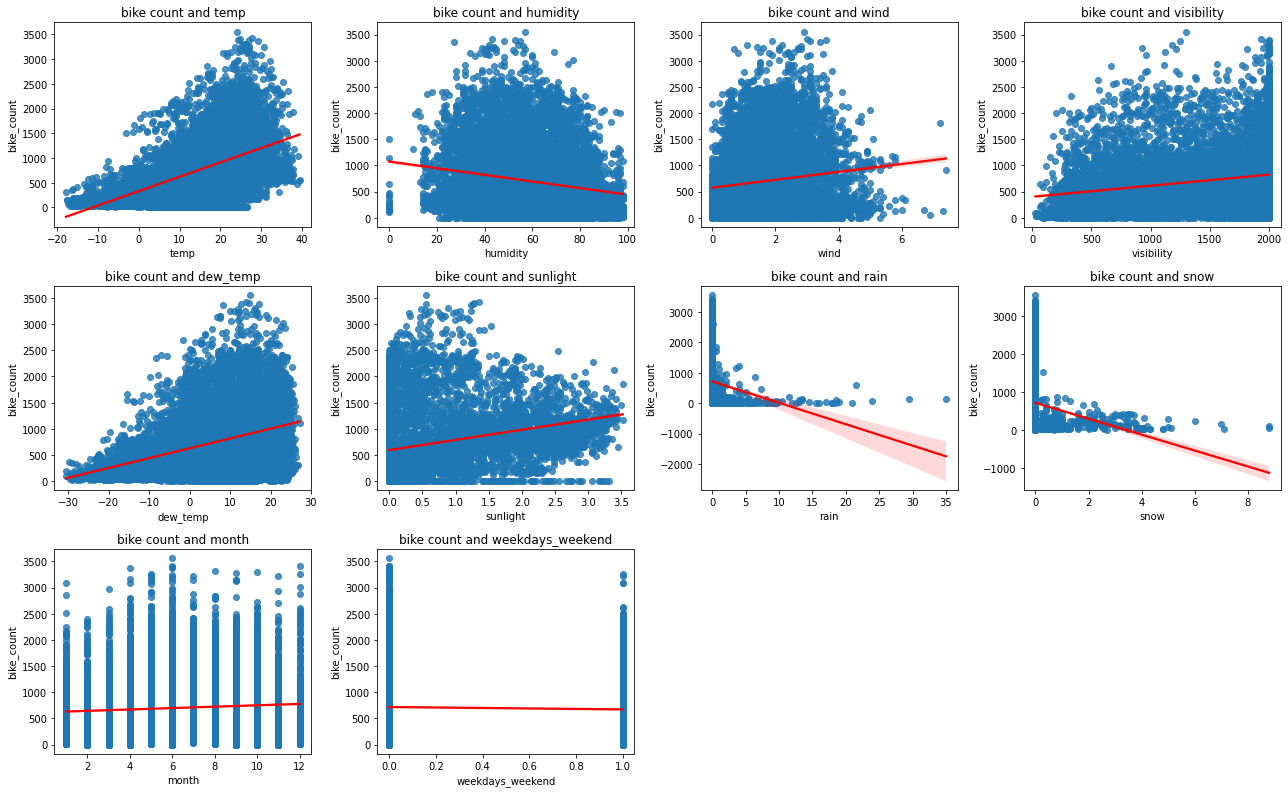

In [ ]:
n=1
plt.figure(figsize=(18,18))
for i in numeric_features.columns:
  if i == 'bike_count':
    pass
  else:
    plt.subplot(5,4,n)
    n+=1
    sns.regplot(bike_df[i], bike_df['bike_count'], line_kws={"color": "red"})
    plt.title(f'bike count and {i}')
    plt.tight_layout()

From the linear regression plot it is observed that temp, wind, visibility, dew temp and sunlight parameters are positively correlated with target variable.
Humidity, rain and snow variables are negatively correlated with target variable. 

## **CORRELATION** **HEATMAP**

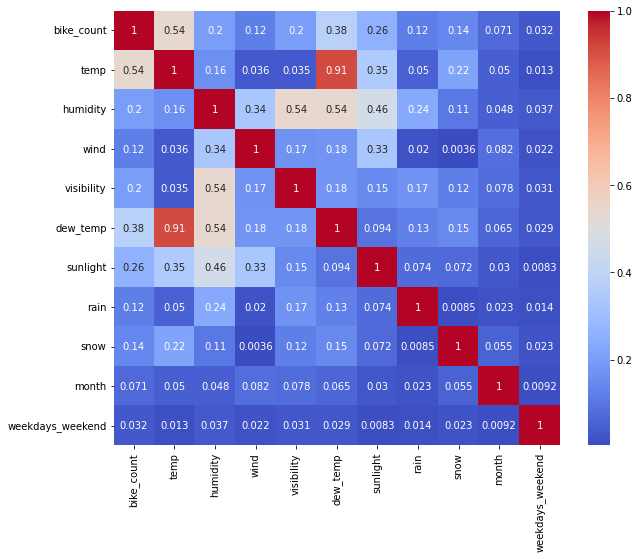

In [ ]:
#Plotting heatmap for numerical data type.

plt.figure(figsize=(10,8))
sns.heatmap(abs(bike_df.corr()), cmap='coolwarm', annot=True)

It is observed that temp is highly correlated with dew_temp. There is multicollinearity so we can drop dew_temp column.

In [ ]:
# Defining a function to calculate Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))


In [ ]:
# Checking VIF for each variable
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['bike_count','dew_temp']]])

,variables,VIF
0,visibility,5.092715
1,wind,3.685326
2,month,3.664056
3,temp,2.434926
4,sunlight,1.892289
5,weekdays_weekend,1.371641
6,snow,1.078138
7,rain,1.042928


Since humidity can be decided on temperature, humidity coloumn can be removed.

In [ ]:
bike_df.drop(columns=['dew_temp','humidity'],inplace=True)

**Normalizing target variable.**

Text(0.5, 1.0, 'Square root')

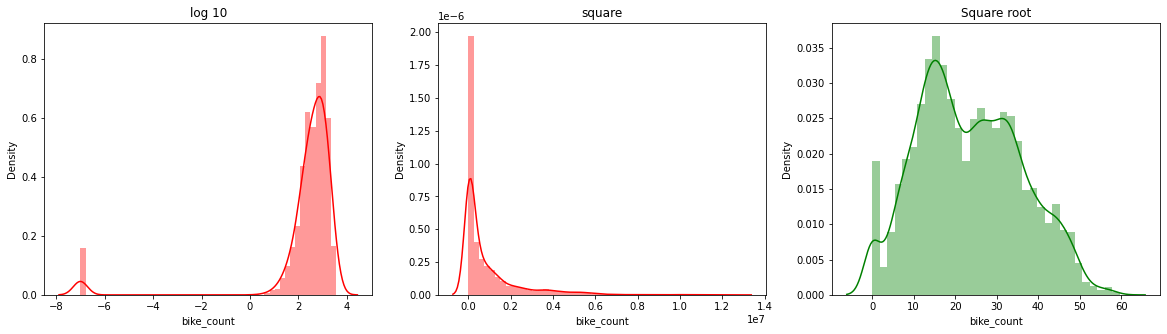

In [ ]:
#Applying log 10, square and sqaure root method of normalization.
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(bike_df['bike_count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((bike_df['bike_count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(bike_df['bike_count']),ax=axes[2], color='green').set_title("Square root")

It is appropriate to go with sqaure root beacause it is normalized to some extent.

In [ ]:
encoder = {'holiday':{'Holiday':1, 'No Holiday':0},'functioning_day':{'Yes':1, 'No': 0}}
bike_df = bike_df.replace(encoder)

In [ ]:
bike_df.head().T

,0,1,2,3,4
bike_count,254,204,173,107,78
hour,0,1,2,3,4
temp,-5.2,-5.5,-6.0,-6.2,-6.0
wind,2.2,0.8,1.0,0.9,2.3
visibility,2000,2000,2000,2000,2000
sunlight,0.0,0.0,0.0,0.0,0.0
rain,0.0,0.0,0.0,0.0,0.0
snow,0.0,0.0,0.0,0.0,0.0
holiday,0,0,0,0,0
functioning_day,1,1,1,1,1


## **BUILDING MODEL**

Storing independent and target features into separate variables.

In [ ]:
#creating x and y variables.
X=bike_df.drop(columns='bike_count')  # Independent variable.
Y= np.sqrt(bike_df['bike_count'])     #Target variable.
X,Y.shape

(     hour  temp  wind  visibility  sunlight  rain  snow  holiday  \
 0       0  -5.2   2.2        2000       0.0   0.0   0.0        0   
 1       1  -5.5   0.8        2000       0.0   0.0   0.0        0   
 2       2  -6.0   1.0        2000       0.0   0.0   0.0        0   
 3       3  -6.2   0.9        2000       0.0   0.0   0.0        0   
 4       4  -6.0   2.3        2000       0.0   0.0   0.0        0   
 ...   ...   ...   ...         ...       ...   ...   ...      ...   
 8755   19   4.2   2.6        1894       0.0   0.0   0.0        0   
 8756   20   3.4   2.3        2000       0.0   0.0   0.0        0   
 8757   21   2.6   0.3        1968       0.0   0.0   0.0        0   
 8758   22   2.1   1.0        1859       0.0   0.0   0.0        0   
 8759   23   1.9   1.3        1909       0.0   0.0   0.0        0   
 
       functioning_day  month  weekdays_weekend  Autumn  Spring  Summer  Winter  
 0                   1      1                 0       0       0       0       1  
 1    

In [ ]:
#Splitting data into training and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [ ]:
#Scaling of data sng standadscaler.
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Function to calculate scores after training linear models.

In [ ]:
#creating some of the matrices to store scores.
mean_sqaure_error=[]
root_mean_sqaure_error=[]
R2_list=[]
adj_R2_list=[]

In [ ]:
#defining function to train and evaluate linear model.
def train_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)
#predicting the values
  pred = model.predict(X_test)

  
  #calcultaing mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #calcultaing root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #calcultaing the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)

  #calculating the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  
  

  #appending metrice to list
  mean_sqaure_error.append(MSE)
  root_mean_sqaure_error.append(RMSE)
  R2_list.append(r2)
  adj_R2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  PREDICTED AND ACTUAL VALUES\
  ===================================================\n')  
  plt.figure(figsize=(18,6))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

## **FUNCTION TO RUN DIFFERENT MODELS.**

In [ ]:
def run_algorithm(model,X_train,y_train,X_test,y_test):
    
    # training of Model
    model.fit(X_train,y_train)
    
    # predicting the values.
    
    pred1 = model.predict(X_test)

    

    #calcultaing mean_squared_error
    MSE  = mean_squared_error(y_test,pred1)
    print("MSE :" , MSE)
    
    #calcultaing root_mean_squared_error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,pred1)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,pred1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    

    mean_sqaure_error.append(MSE)
    root_mean_sqaure_error.append(RMSE)
    R2_list.append(r2)
    adj_R2_list.append(adj_r2)

    #ploting the line graph of actual and predicted values
    print('\
    =========================================================\
    PREDICTED AND ACTUAL VALUES\
    ===================================================\n') 
    plt.figure(figsize=(18,6))
    plt.plot(np.array(y_test[:100]))
    plt.plot(pred1[:100])    
    plt.legend(["actual","predicted"])
    plt.show()

## **Function to get feature importance.**

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  X_train = pd.DataFrame(X_train, columns = X.columns)

  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,8))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

## **LINEAR REGRESSION**

MSE : 186162.25691611206
RMSE : 431.46524415775605
R2 : 0.5471972621048273
Adjusted R2 :  0.5440730481819076
  =========================================================  PREDICTED AND ACTUAL VALUES  ===================================================



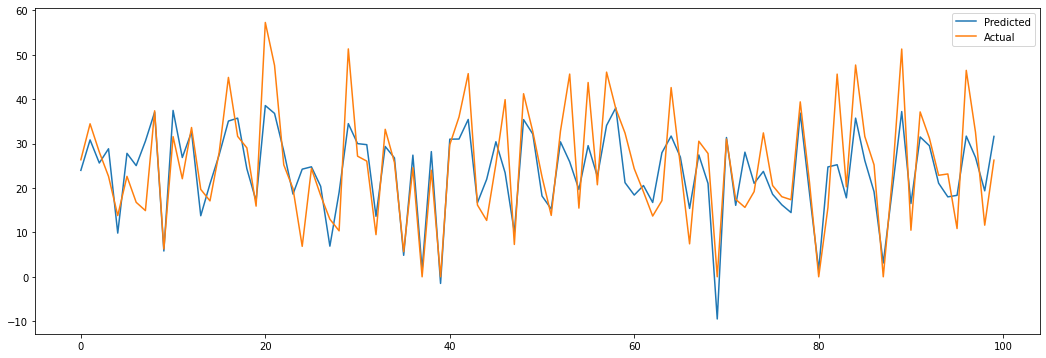

In [ ]:
#LinearRegression model
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression()
train_model(linear_model, X_train, y_train, X_test, y_test)

## **REGULARISATION**

**1. L1/LASSO REGULARISATION**

MSE : 185866.55988050328
RMSE : 431.1224418660008
R2 : 0.5479164864499183
Adjusted R2 :  0.5447972349764817
  =========================================================  PREDICTED AND ACTUAL VALUES  ===================================================



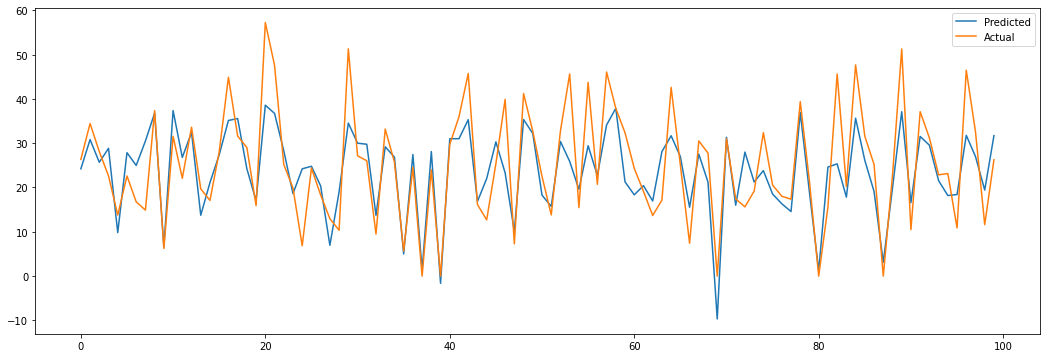

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
train_model(lasso_grid,X_train,y_train,X_test,y_test)

**2.L2/RIDGE REGRESSION**

MSE : 186166.77255529742
RMSE : 431.47047703788195
R2 : 0.5471862787088353
Adjusted R2 :  0.5440619890035145
  =========================================================  PREDICTED AND ACTUAL VALUES  ===================================================



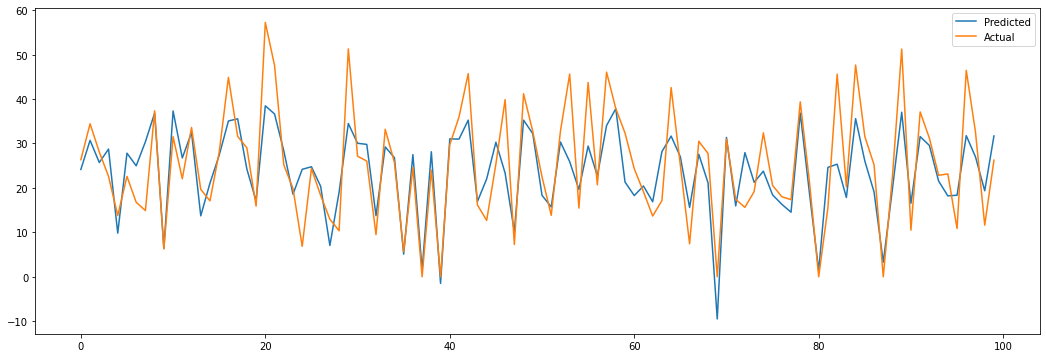

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(ridge_grid,X_train,y_train,X_test,y_test)

**3. POLYNOMIAL REGRESSION**

MSE : 132023.117185807
RMSE : 363.34985507883033
R2 : 0.6788799732153724
Adjusted R2 :  0.6766643336561409
  =========================================================  PREDICTED AND ACTUAL VALUES  ===================================================



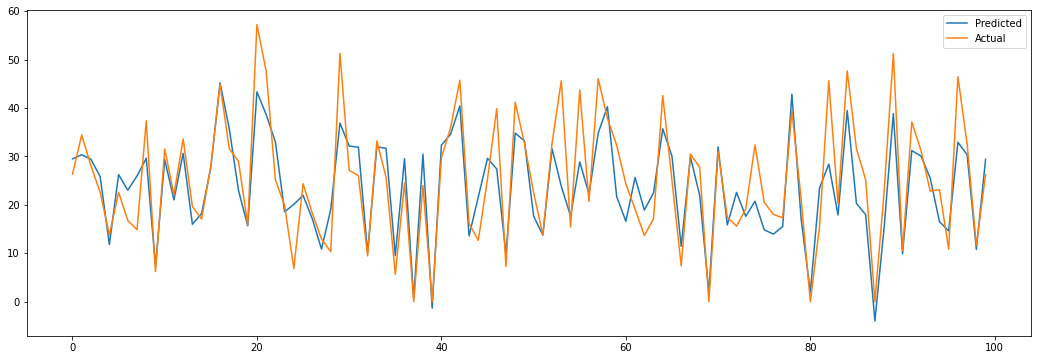

In [ ]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
train_model(pipe,X_train,y_train,X_test,y_test)

## **Different Algorithms**

# **1.Decision Tree Regressor**

MSE : 26.68755836051122
RMSE : 5.166000228466044
R2 : 0.8257800180531282
Adjusted R2 :  0.8245779482604865
    =========================================================    PREDICTED AND ACTUAL VALUES    ===================================================



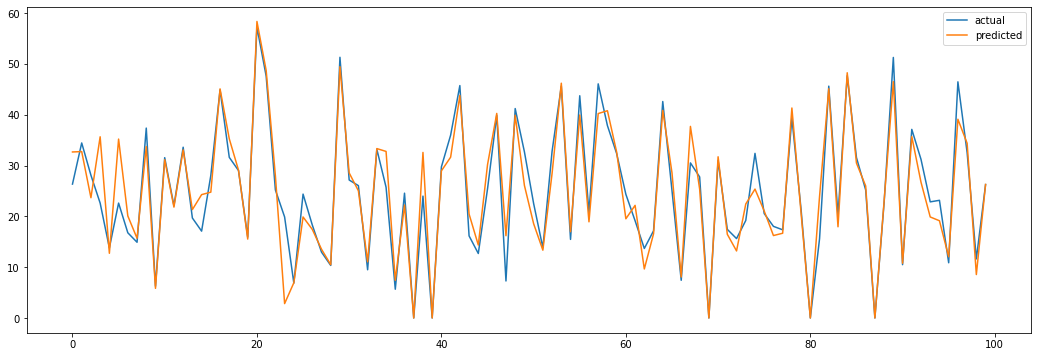

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()
run_algorithm(decision_tree_model,X_train,y_train,X_test,y_test)



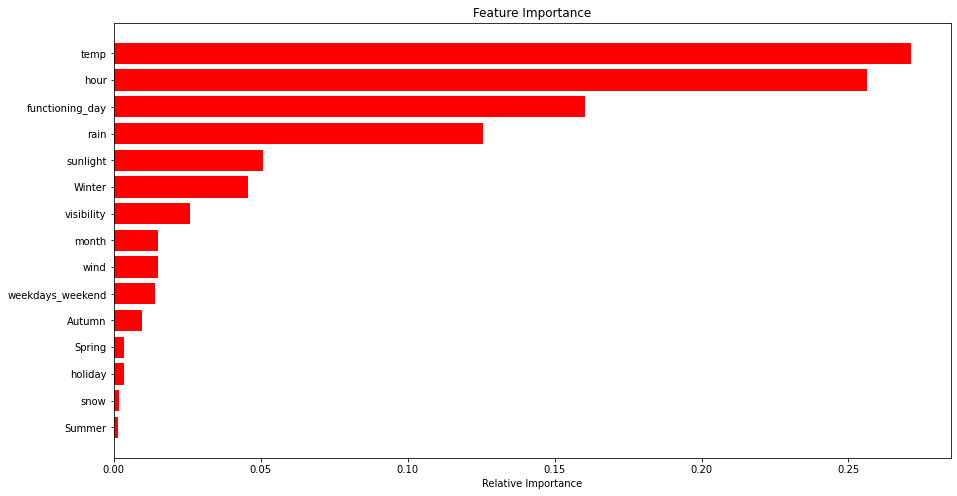

In [ ]:
#Features importance of decision tree algorithm.
get_features_importance (decision_tree_model,X_train)

# **2.KNN REGRESSOR**

MSE : 25.654313191782904
RMSE : 5.065008705992804
R2 : 0.8325251819310233
Adjusted R2 :  0.8313696519075483
    =========================================================    PREDICTED AND ACTUAL VALUES    ===================================================



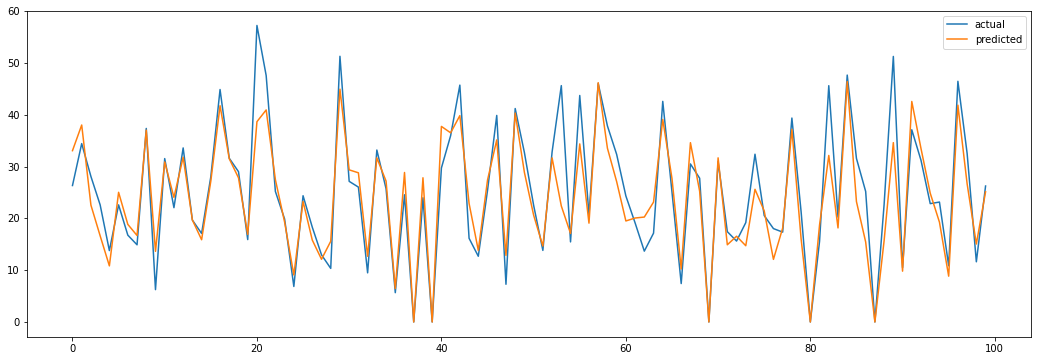

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
#Scaling data by min max scaler.
scaler = MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
knn_model = KNeighborsRegressor(n_jobs=-1)   #KNN Model
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)
run_algorithm(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)


# **3.RANDOM FOREST REGRESSOR**

MSE : 19.637073079851035
RMSE : 4.431373723784875
R2 : 0.871806537291802
Adjusted R2 :  0.8709220377790959
    =========================================================    PREDICTED AND ACTUAL VALUES    ===================================================



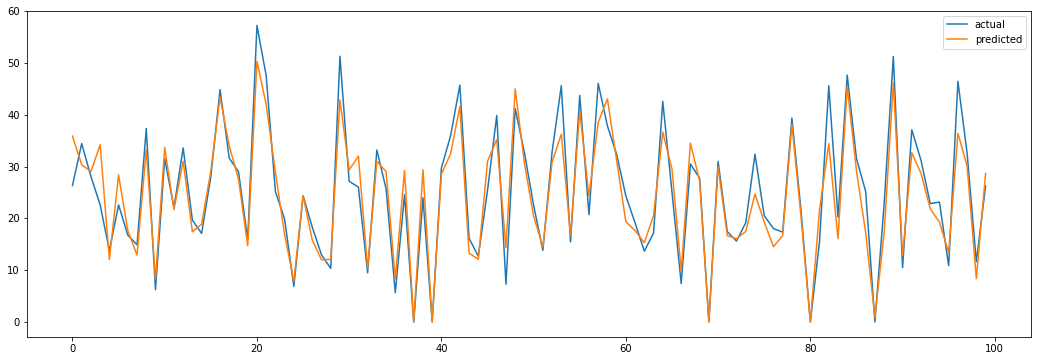

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()     #random forest model
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(random_forest_model,param_grid=params,verbose=0)
run_algorithm(rf_grid,X_train,y_train,X_test,y_test)

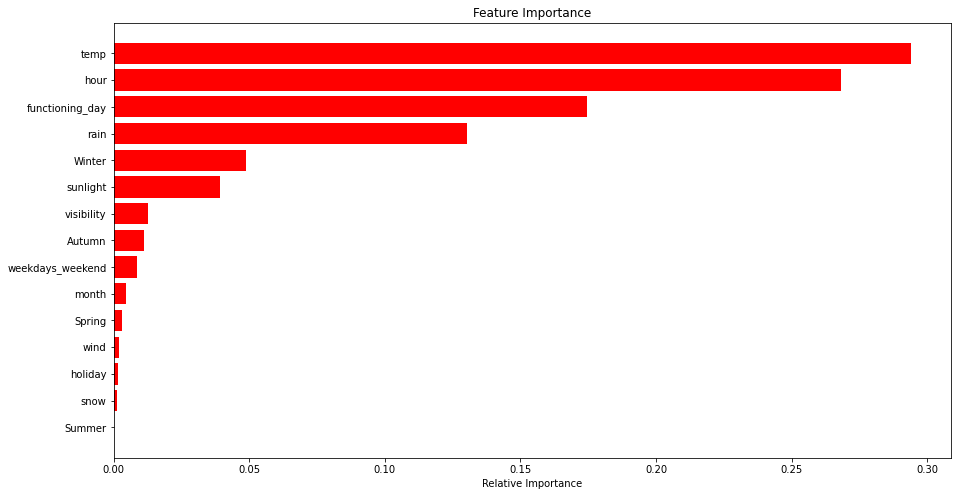

In [ ]:
#Features importance of RandomForestRegressor algorithm.
optimal_RF=rf_grid.best_estimator_
get_features_importance (optimal_RF,X_train)

## **4.GRADIENT BOOSTING**

MSE : 16.585463172944223
RMSE : 4.072525404824901
R2 : 0.8917278585197818
Adjusted R2 :  0.8909808106254841
    =========================================================    PREDICTED AND ACTUAL VALUES    ===================================================



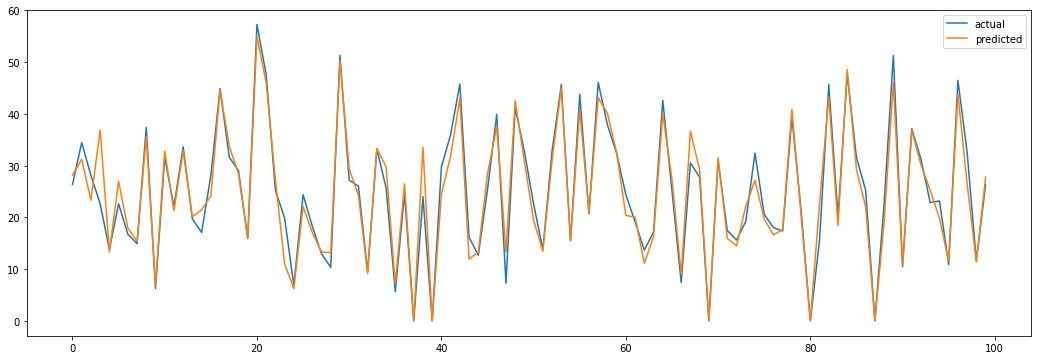

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting_model=GradientBoostingRegressor()  #gradient boosting model
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }
#grid search for gradient bossting
gb_grid= GridSearchCV(gradient_boosting_model,param_grid=params,verbose=0)
run_algorithm(gb_grid,X_train,y_train,X_test,y_test)

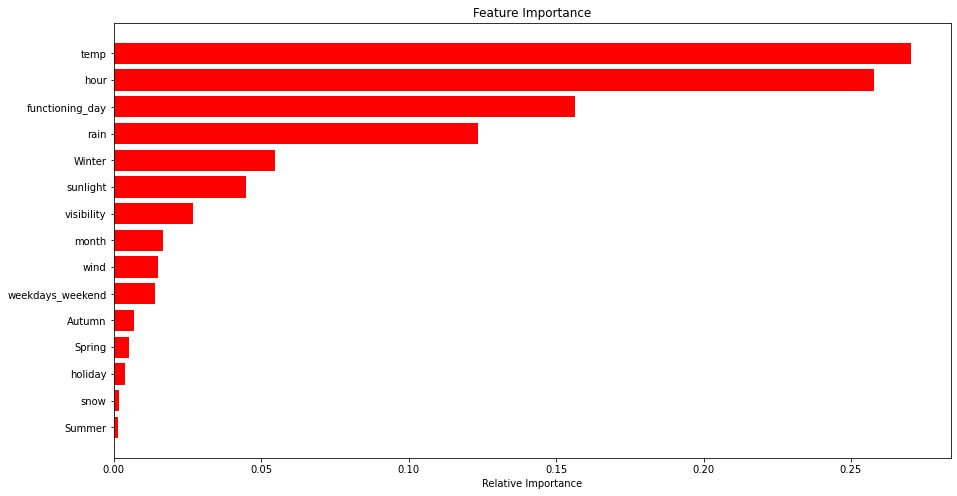

In [ ]:
#Features importance of RandomForestRegressor algorithm.
optimal_GB=gb_grid.best_estimator_
get_features_importance (optimal_GB,X_train)

# **5.XG Boosting**

[09:54:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:55:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

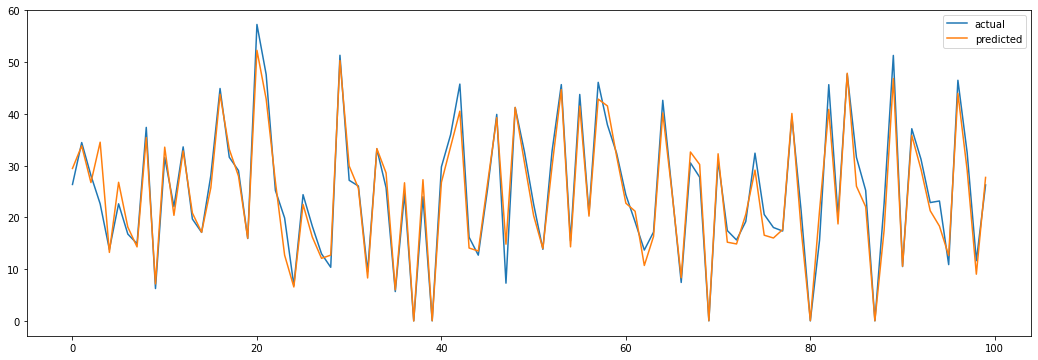

In [ ]:
from xgboost import XGBRegressor
XGB_model=XGBRegressor()
n_estimators=[80,100,150]
max_depth=[15,20,30]
params = {'n_estimators':n_estimators,'max_depth':max_depth }
xgb_grid= GridSearchCV(XGB_model,param_grid=params,verbose=0)
run_algorithm(xgb_grid,X_train,y_train,X_test,y_test);

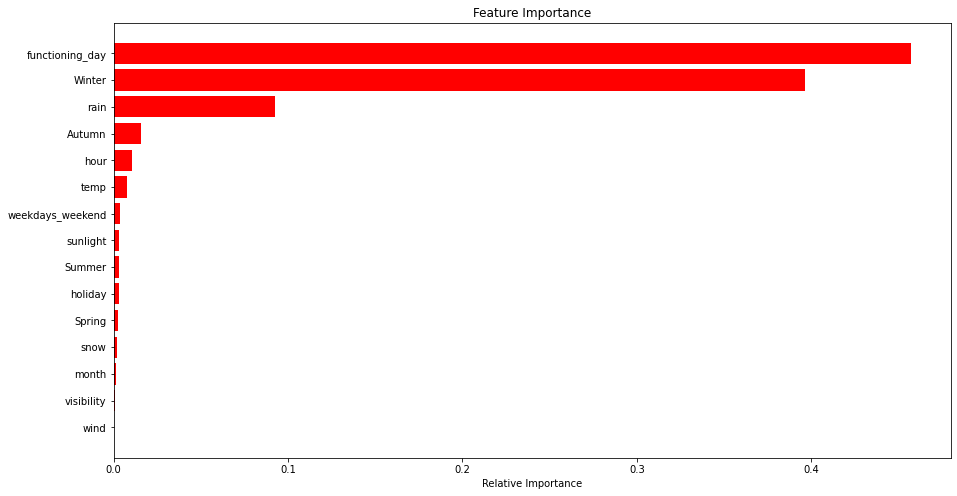

In [ ]:
#Features importance of XG Boostingm algorithm.
optimal_XGB=xgb_grid.best_estimator_
get_features_importance (optimal_XGB,X_train)

# **COMPARISION OF ALL THE MODELS**

In [ ]:
del mean_sqaure_error[4:8]
del root_mean_sqaure_error[4:8]
del R2_list[4:8]
del adj_R2_list[4:8]

In [ ]:
#Storing different algorithms name.
algorithms_name=['Linear','Lasso','Ridge','Polynomial','Decision_Tree','K-Nearest_Neighbor','Random_Forest','Gradient_Boosting','XG_Boosting']

In [ ]:
adj_R2_list

[0.5440730481819076,
 0.5447972349764817,
 0.5440619890035145,
 0.6766643336561409,
 0.8245779482604865,
 0.8313696519075483,
 0.8709220377790959,
 0.8909808106254841,
 0.9080126395901452]

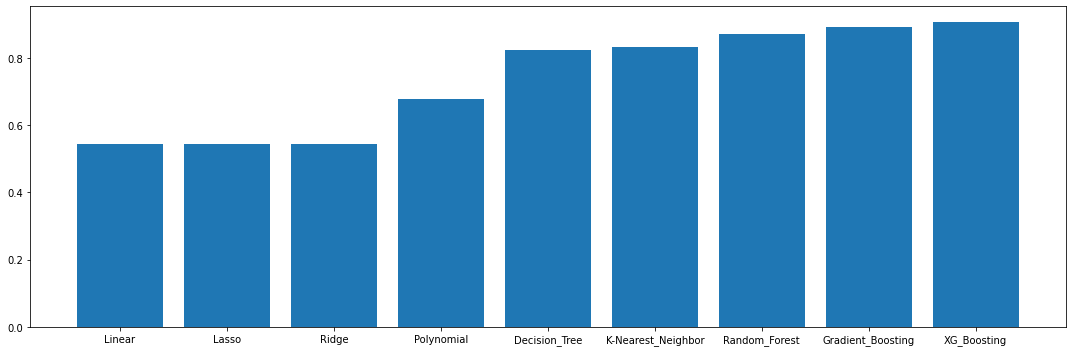

In [ ]:

plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
X= algorithms_name
Y = adj_R2_list
plt.bar(X, Y)

# Display the plot
plt.show()

r2 and adjusted r2 value is more for XG Boosting. Also from the feature importance graph it is observed that XG boosting model has taken functioning day as more importance. So we XG Boosting model is best suitable for bike sharing prediction

**CONCLUSION**

1.No. of bikes rented are more in summer and less in winter.

2.Bike counts for renting is more in functioning day,non holiday and in morning time.

3.It is observed that bike counts starts to increase after 6'o clock in the morning and reaches maximum at 8'oclock and again starts to decrease.
During evening time again renting of bikes starts to increase after 5pm and reaches max at 6:00 pm and again decreases.

4.Different models are performed and it is observed that r2 and adjusted r2 value is more for XG Boosting. XG Boosting model is best suitable for bike sharing prediction.